# TP1 SD-TSIA 204 Linear Regression

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D


In [5]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


## 1) Import data

In [6]:
df = pd.read_csv('invest.txt', sep=' ')

In [7]:
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## 2) Plot Investment vs GNP

Text(0, 0.5, 'Investment')

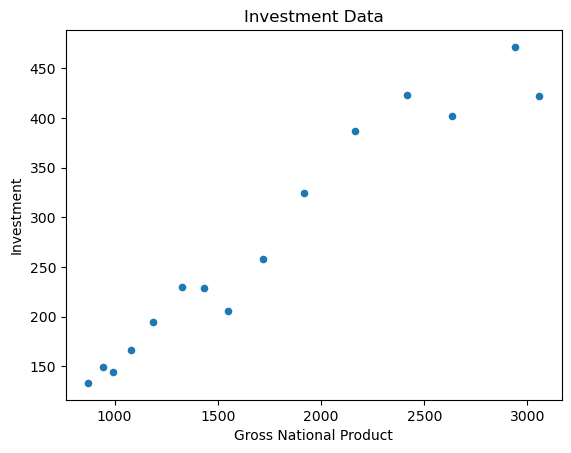

In [8]:
df.plot(kind = 'scatter', x = 'gnp', y= 'invest')
plt.title('Investment Data')
plt.xlabel('Gross National Product')
plt.ylabel('Investment')

In [9]:
X = np.asarray(np.log(df['gnp']))
Y = np.asarray(np.log(df['invest']))

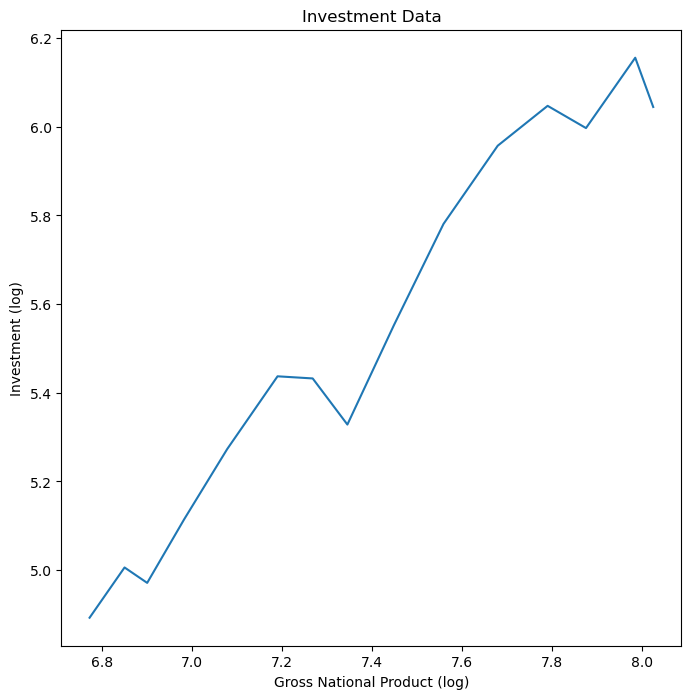

In [10]:
plt.figure(figsize=(8,8))
plt.plot(X, Y)
plt.title('Investment Data')
plt.xlabel('Gross National Product (log)')
plt.ylabel('Investment (log)')
plt.show()

## 3) Computing intercept, slope and OLS determination coefficient

In [11]:
N = len(Y)

In [12]:
n = len(X)
X_bar = np.mean(X)
Y_bar = np.mean(Y)
X_var = np.sum((X - X_bar) ** 2)

In [13]:
#intercept beta_0

slope = np.sum((X-np.mean(X))*(Y-np.mean(Y))) /(N* (np.var(X)))
intercept = Y.mean() - slope*X.mean()

In [14]:
print(intercept)
print(slope)

-1.9635913352301815
1.015281401598871


In [15]:
def f(x):
    return intercept + slope*x

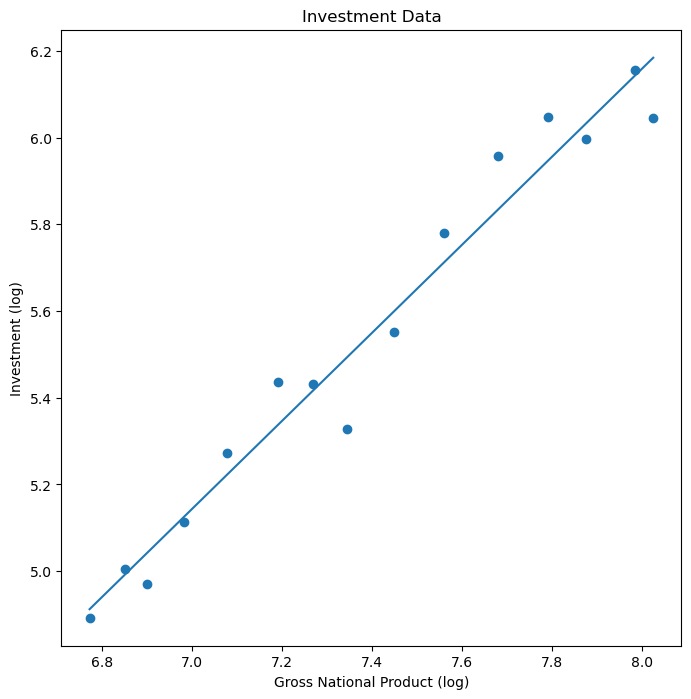

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y)
plt.plot(X, f(X))
plt.title('Investment Data')
plt.xlabel('Gross National Product (log)')
plt.ylabel('Investment (log)')
plt.show()

In [17]:
def sum_of_squares(T,U):
    res = 0
    if len(T) == len(U):
        l = len(T)
        for i in range(l):
            
            res += (T[i] - U[i])**2
    return res

In [18]:
r_squared = 1 - (sum_of_squares(Y, f(X)))/(np.var(Y)*N)

In [19]:
r_squared

0.9627572956057855

In [20]:
sigma_squared_estimator = (1/(N-2))*sum_of_squares(Y, intercept + slope*X)

In [21]:
slope_variance = sigma_squared_estimator/(N*np.var(X))

In [22]:
slope_variance

0.003067283374269269

## 4) Student t-test

In [23]:
alpha = 5/100

In [24]:
p=1

We will do a significance test on the slope. $ H_{0} $: '$ slope = 0 $' at $\alpha = 5$%

If we reject the null hypothesis then slope is not null.

In [25]:
#Student statistic computation for j = p = 1

student_stat = slope/(np.sqrt(slope_variance))

#Student quantiles interval for x = 0.975 (97.5th quantile) for n - 2 degrees of freedom (df)

sup = stat.t.ppf(1-alpha/2, N-(p+1))

In [26]:
student_stat

18.331984456866678

In [27]:
stat.t(df=N-(p+1)).ppf((0.025, 0.975))

array([-2.16036866,  2.16036866])

In [28]:
sup

2.1603686564610127

In [29]:
interval = [-sup,sup]

In [30]:
-sup< student_stat < sup

False

In [31]:
p_value = 2*stat.t.sf(student_stat, N-(p+1))

In [32]:
p_value

1.1363715333556905e-10

We reject the null hypothesis! Slope is significant and there is heavy probability that Y is linear dependent of X, (ie) slope > 0. $p_{value} = 10 ^ {-10}$

## 5) Necessary investment, confidence and prediction intervals 

In [33]:
alpha = 10/100 #alpha= 0.1 pour 90%

In [34]:
GNP = 1000

In [35]:
np.log(GNP)

6.907755278982137

In [46]:
def CI(const,slpe,x):
    
    sup = const + slpe*x + stat.t.ppf(1-alpha/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1/N + (x-x.mean())**2/(N*np.var(x))))
    inf = const + slpe*x - stat.t.ppf(1-alpha/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1/N + (x-x.mean())**2/(N*np.var(x))))
    return [np.exp(inf), np.exp(sup)]

def PI(const,slpe,x):

    sup = const + slpe*x + stat.t.ppf(1-alpha/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1+ 1/N + (x-x.mean())**2/(N*np.var(x))))
    inf = const + slpe*x - stat.t.ppf(1-alpha/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1+ 1/N + (x-x.mean())**2/(N*np.var(x))))
    
    return [np.exp(inf),np.exp(sup)]

In [47]:
#Necessary investment

necessary_invest = np.exp(f(np.log(GNP)))
confidence = CI(intercept, slope, np.log(GNP))
prediction = PI(intercept, slope, np.log(GNP))

C:\Users\Augustin\AppData\Local\Temp\ipykernel_57464\2802060528.py:3: RuntimeWarning: invalid value encountered in double_scalars
  sup = const + slpe*x + stat.t.ppf(1-alpha/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1/N + (x-x.mean())**2/(N*np.var(x))))
C:\Users\Augustin\AppData\Local\Temp\ipykernel_57464\2802060528.py:4: RuntimeWarning: invalid value encountered in double_scalars
  inf = const + slpe*x - stat.t.ppf(1-alpha/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1/N + (x-x.mean())**2/(N*np.var(x))))
C:\Users\Augustin\AppData\Local\Temp\ipykernel_57464\2802060528.py:9: RuntimeWarning: invalid value encountered in double_scalars
  sup = const + slpe*x + stat.t.ppf(1-alpha/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1+ 1/N + (x-x.mean())**2/(N*np.var(x))))
C:\Users\Augustin\AppData\Local\Temp\ipykernel_57464\2802060528.py:10: RuntimeWarning: invalid value encountered in double_scalars
  inf = const + slpe*x - stat.t.ppf(1-alpha/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1+ 1/N

In [38]:
X

array([6.77239364, 6.85012617, 6.9004285 , 6.98249163, 7.07825726,
       7.19022378, 7.26836248, 7.34549395, 7.4489161 , 7.55919466,
       7.67966743, 7.79061331, 7.87591714, 7.98538224, 8.02535287])

In [48]:
print(np.log(necessary_invest))
print(np.log(confidence))
print(prediction)

5.049724126316802
[nan nan]
[nan, nan]


## 6)Plot

In [49]:
def f_1(x,est):
    
    return intercept + est*x

[array([126.49452315, 137.73362839, 145.50887923, 159.08830914,
       176.41121791, 198.77779738, 215.7710918 , 233.67160188,
       259.45476486, 289.31274828, 325.04007217, 361.22904681,
       391.47946735, 433.75403862, 450.24090387]), array([146.11426223, 157.13528605, 164.7342657 , 177.99325311,
       194.9699601 , 217.20262812, 234.50238044, 253.2525955 ,
       281.38586731, 315.67984254, 358.85409183, 404.49311073,
       443.82424684, 500.27594478, 522.70516313])]


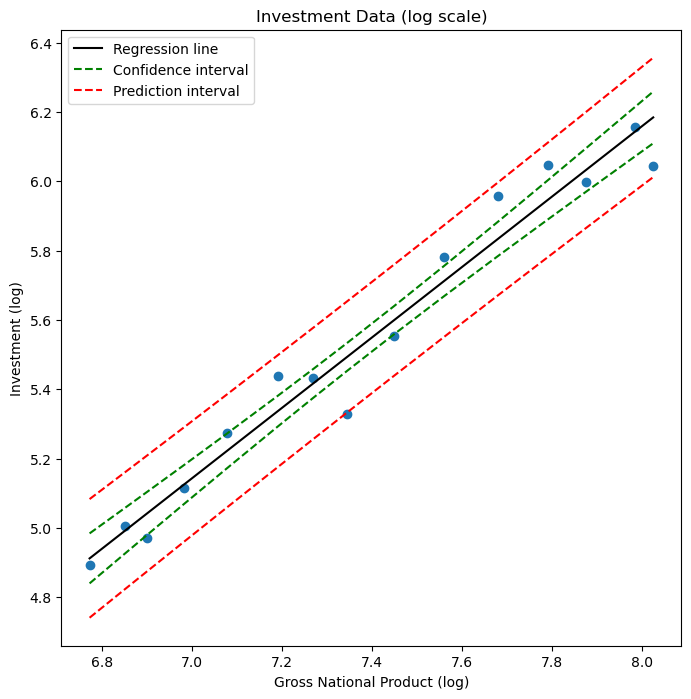

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y)
plt.plot(X, f(X), c= 'k', label= 'Regression line')
plt.plot(X, np.log(CI(intercept,slope, X))[0],'g--', label = 'Confidence interval')
plt.plot(X, np.log(CI(intercept,slope, X))[1],'g--')
plt.plot(X, np.log(PI(intercept,slope, X))[0],'r--', label = 'Prediction interval')
plt.plot(X, np.log(PI(intercept,slope, X))[1],'r--')
print(CI(intercept,slope, X))
plt.title('Investment Data (log scale)')
plt.xlabel('Gross National Product (log)')
plt.ylabel('Investment (log)')
plt.legend()
plt.show()